In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url = 'https://gist.githubusercontent.com/zgulde/018f5d601efc79cb741a7aba92f51d29/raw/c08f1c09f605b43e9a354890f9dd68f296e76dc4/students.csv'
df = pd.read_csv(url)

## Instructions:
df contains (fake) data on students time at codeup:

    ml_coffee: coffee consumption in milliliters
    syntax_errors: number of syntax errors
    p_days_absent: percentage of days absent

1. Create a scatter plot of syntax_errors and ml_coffee. Make sure to give your visual an appropriate title and labels.

2. Create a scatter plot of p_days_absent and ml_coffee. Make sure to give your visual an appropriate title and labels.

3. Perform any other customizations you think will help to the plots you have created


In [2]:
df.head()

,ml_coffee,syntax_errors,p_days_absent
0,16225,5.071306e+10,0.038821
1,18230,5.199823e+10,0.022748
2,15877,5.072630e+10,0.036627
3,8263,4.907919e+10,0.041293
4,13935,5.145114e+10,0.081544


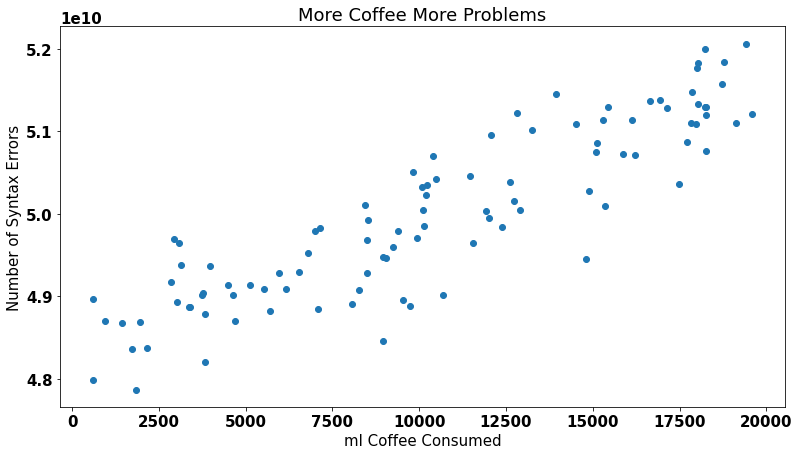

In [3]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}

mpl.rc('font', **font)
# Scatter syntax_errors vs. ml_coffee
plt.figure(figsize=(13,7))
plt.scatter(df.ml_coffee, df.syntax_errors)
plt.title("More Coffee More Problems")
plt.xlabel("ml Coffee Consumed")
plt.ylabel("Number of Syntax Errors")
plt.show()

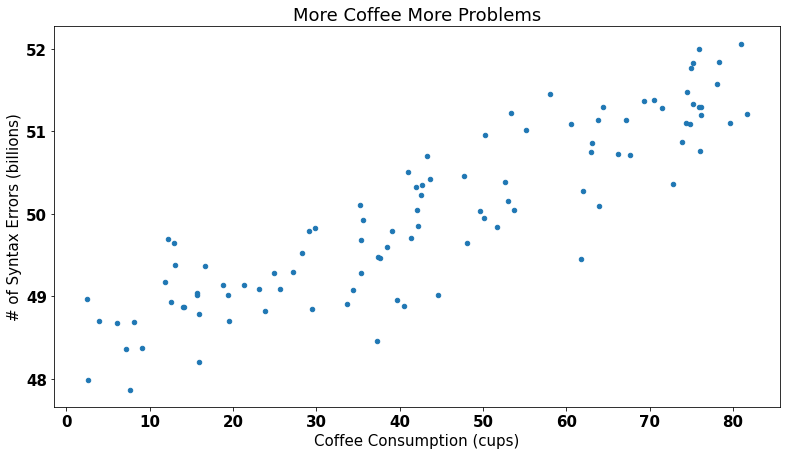

In [4]:
# Change Scale to 'people friendly'

df['syntax_errors_billions'] = df.syntax_errors / 1_000_000_000
df['cups_coffee'] = df.ml_coffee / 30 / 8



ax = df.plot.scatter(y='syntax_errors_billions', x='cups_coffee', figsize=(13, 7))
ax.set(
    xlabel='Coffee Consumption (cups)',
    ylabel='# of Syntax Errors (billions)',
    title='More Coffee More Problems',
)
plt.show()

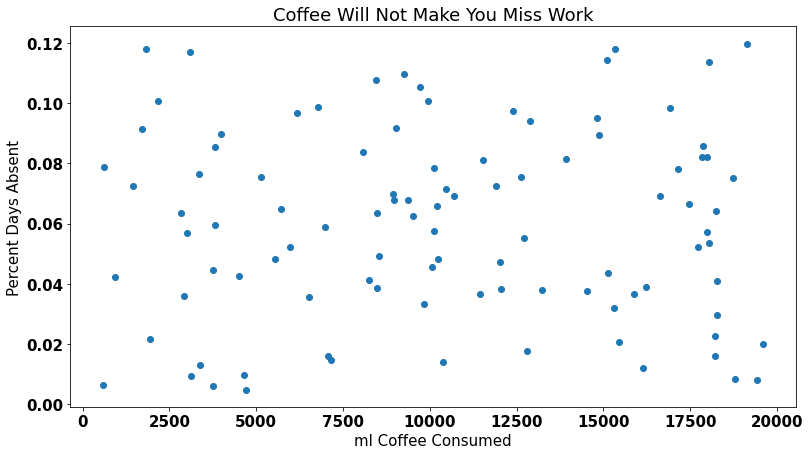

In [5]:
# Scatter p_days_absent vs. ml_coffee
plt.figure(figsize=(13,7))
plt.scatter(df.ml_coffee, df.p_days_absent)
plt.title("Coffee Will Not Make You Miss Work")
plt.xlabel("ml Coffee Consumed")
plt.ylabel("Percent Days Absent")
plt.show()

In [6]:
 # Changing Axis Labels Programatically
    
def format_y_tick(tick_value, position):
    return '{:.0%}'.format(tick_value)

def format_x_tick(tick_value, position):
    return '{:,}'.format(int(tick_value))

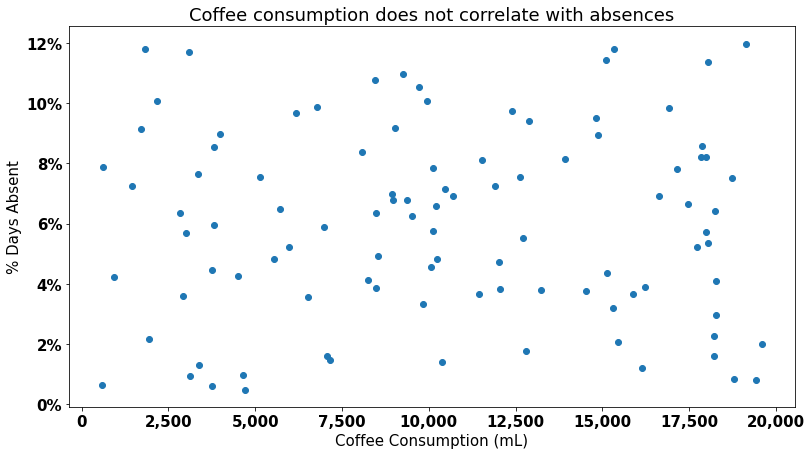

In [7]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.scatter(df.ml_coffee, df.p_days_absent)
ax.set(
    xlabel='Coffee Consumption (mL)',
    ylabel='% Days Absent',
    title='Coffee consumption does not correlate with absences',
)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_y_tick))
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_x_tick))

### Other things to consider


How to handle number presentation on x and y axis:

- domain-based scaling: e.g. divide by 1,000,000,000 and label as "billions", e.g. mL -> cups
- A custom function + mpl.ticker.FuncFormatter
- ax.get_xticks() + ax.set_xticks()

